# Graphing PD Call Types by Date

Below I import and clean the data.  I also add a "DateTime" column which allows for manipulation of the date and time format

In [1]:
import numpy as np
import pandas as pd
import matplotlib as pt
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline

filename = input("What is the exact name of your file? (include .csv)")



What is the exact name of your file? (include .csv)Event_Detail.csv


In [2]:
all_data = pd.read_csv(filename)
all_data.head()

,Agency Event Number,Primary Unit ID,Agency ID,Agency Name,Create Datetime,Dispatch Group,Event Type Code,Event Priority,Event Type,Event SubType Code,Event SubType,Event Beat,Event ESZ,Full Address,Full Location
0,PP170010001,80X5,PAPD,Palo Alto Police Department,2017/01/01 00:11:11,PAPD,1095,4.0,PED/BIKE STOP,NaN,NaN,PA2,80100.0,2375 EMBARCADERO RD PA,BYXBEE PARK 2375 EMBARCADERO RD PA
1,PP170010002,80L31,PAPD,Palo Alto Police Department,2017/01/01 00:13:45,PAPD,ANIMAL,3.0,ANIMAL,N,NOISY,PA3,88300.0,3316 MIDDLEFIELD RD PA,3316 MIDDLEFIELD RD PA
2,PP170010003,80L31,PAPD,Palo Alto Police Department,2017/01/01 00:17:41,PAPD,1195,4.0,TRAFFIC STOP,NaN,NaN,DWNTNPA,80500.0,LYTTON AVE / HIGH ST PA,LYTTON AVE / HIGH ST PA
3,PP170010004,80L39,PAPD,Palo Alto Police Department,2017/01/01 00:27:49,PAPD,1033,2.0,ALARM,R,RESIDENTIAL,PA4,81600.0,895 ILIMA CT PA,895 ILIMA CT PA
4,PP170010005,80L41,PAPD,Palo Alto Police Department,2017/01/01 00:32:23,PAPD,1195,4.0,TRAFFIC STOP,NaN,NaN,PA3,88300.0,ALMA ST / EL DORADO AVE PA,ALMA ST / EL DORADO AVE PA


In [3]:
# Removing "/" from call types- not valid for filenames
all_data["Event Type"] = all_data["Event Type"].str.replace('/','_')

#Changing date and year formats

all_data["Date"]= pd.to_datetime(all_data['Create Datetime'])
all_data['DateYr'] = pd.DatetimeIndex(all_data['Date']).date
all_data["Date"]= pd.DatetimeIndex(all_data['DateYr']).strftime('%B %d')
all_data["Year"]= pd.to_datetime(all_data['Create Datetime'])
all_data['Year'] = pd.DatetimeIndex(all_data['Year']).year

all_data["Year"].value_counts()
all_data["DateYr"].value_counts()



2017-11-03    257
2018-07-11    236
2017-09-28    233
2018-07-06    230
2017-09-15    228
             ... 
2020-03-18     65
2020-03-17     63
2020-03-15     60
2020-03-14     60
2019-12-25     57
Name: DateYr, Length: 1200, dtype: int64

In [4]:
# This shows an agregation of total events by day.
pivot = all_data.pivot_table(values = "Agency Event Number", index = 'DateYr', aggfunc="count")

In [5]:
#descriptive statistics on count of calls per day
pivot.describe()

,Agency Event Number
count,1200.000000
mean,146.400833
std,26.744462
min,57.000000
25%,129.000000
50%,147.000000
75%,164.000000
max,257.000000


In [6]:
#The values of each type of call for the dataset
events = all_data["Event Type"]
events.value_counts()

TRAFFIC STOP                 33138
MEDICAL INFORMATION          14477
PED_BIKE STOP                 9484
911                           9480
PHONE CALL                    9190
                             ...  
GENERAL EXPLOSION                1
STORM DRAIN POLLUTION            1
EXPLOSION                        1
VEGETATION FIRE                  1
COURT ORDERED RECORD SEAL        1
Name: Event Type, Length: 153, dtype: int64

In [7]:
call_type_list= events.value_counts().index.tolist()
print("This is the total number of call types:", len(call_type_list))

years = all_data['Year'].value_counts().index.tolist()


This is the total number of call types: 153


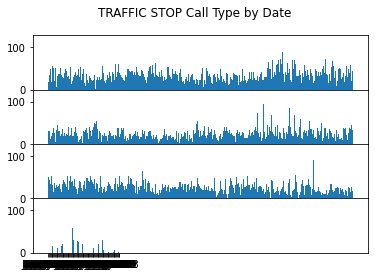

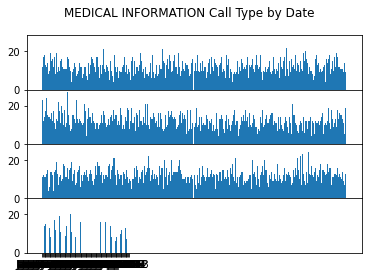

In [12]:

#The number of total dates
total_dates= len(all_data["Date"].value_counts())

# fig = plt.figure(figsize=(16, 20))

for call_type in call_type_list[:2]:
    data_by_ct= all_data.loc[all_data['Event Type'] == call_type]
    fig, axs = plt.subplots(len(years), sharex=True, sharey=True, gridspec_kw={'hspace': 0})
    fig.suptitle("{} Call Type by Date".format(call_type))
    for i, year in enumerate(years):
        filter_ct_year = data_by_ct[data_by_ct["Year"] == year]
        axs[i].hist(filter_ct_year["Date"], bins=total_dates)
for ax in axs.flat:
    ax.label_outer()

#         plt.xticks(rotation=90)

# Hide x labels and tick labels for all but bottom plot.
#     for ax in axs:
#         ax.label_outer()
#     data_by_ct= all_data.loc[all_data['Event Type'] == call_type]
#     ax = fig.add_subplot(1,1)
#     ax.hist(data_by_ct["Date"], bins=total_dates)
#     ax.set_title("{}s".format(call_type.title()))
#     ax.set_ylabel("Total calls")
#     plt.xticks(rotation=90)
#     if call_type in call_type_dict:
#         call_type= call_type_dict[call_type]
    plt.savefig('{}.pdf'.format(call_type))
   